In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as sts
import lmfit
from lmfit import Model
from scipy.stats import sem
from scipy.stats import linregress
from matplotlib import markers
import seaborn as sns


<Figure size 432x288 with 0 Axes>

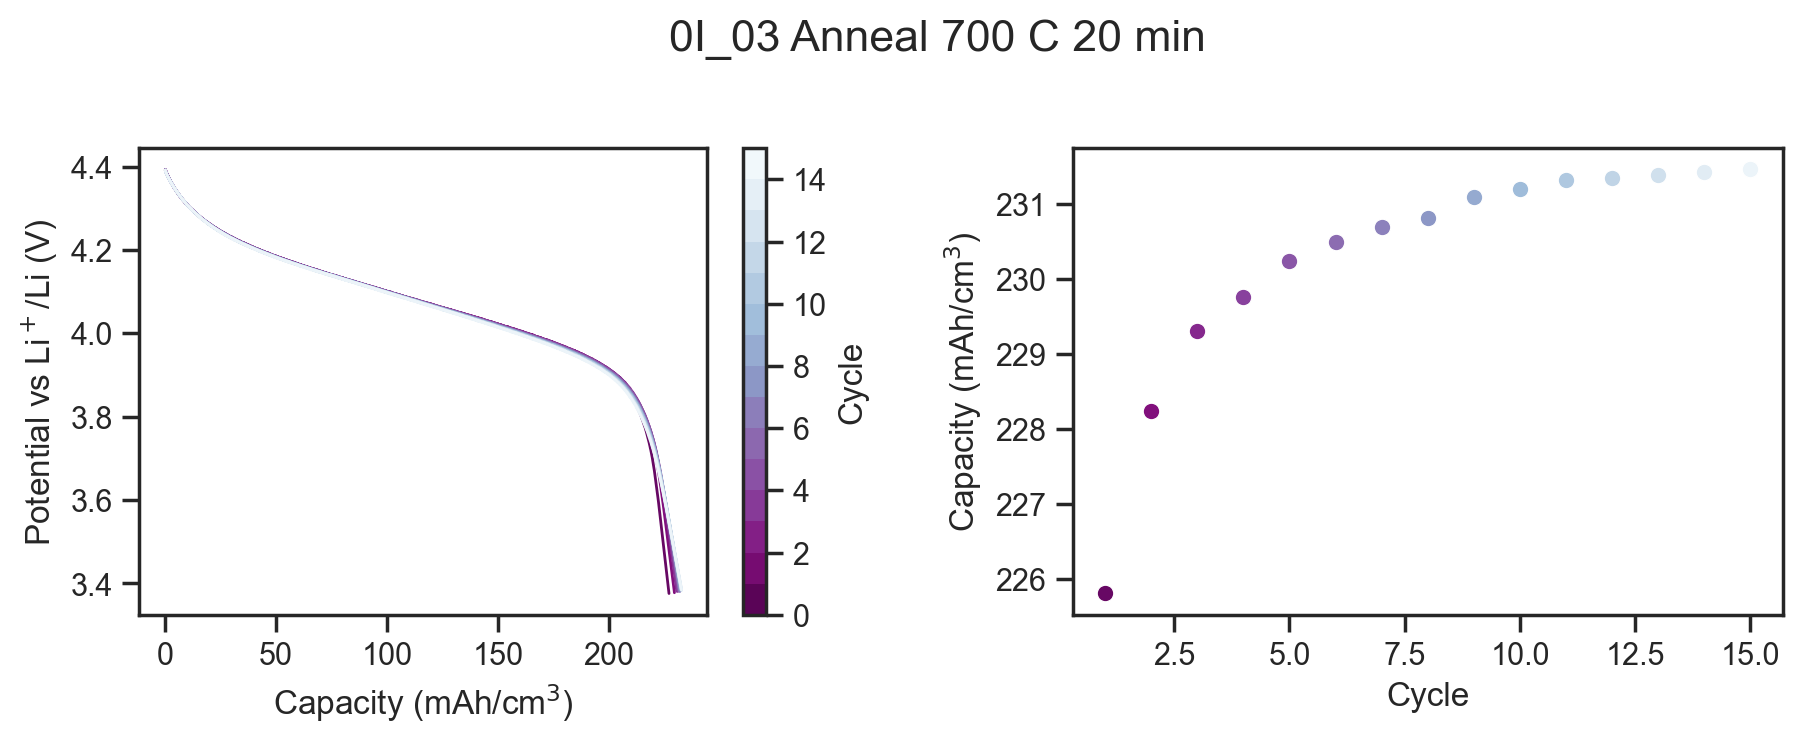

<Figure size 432x288 with 0 Axes>

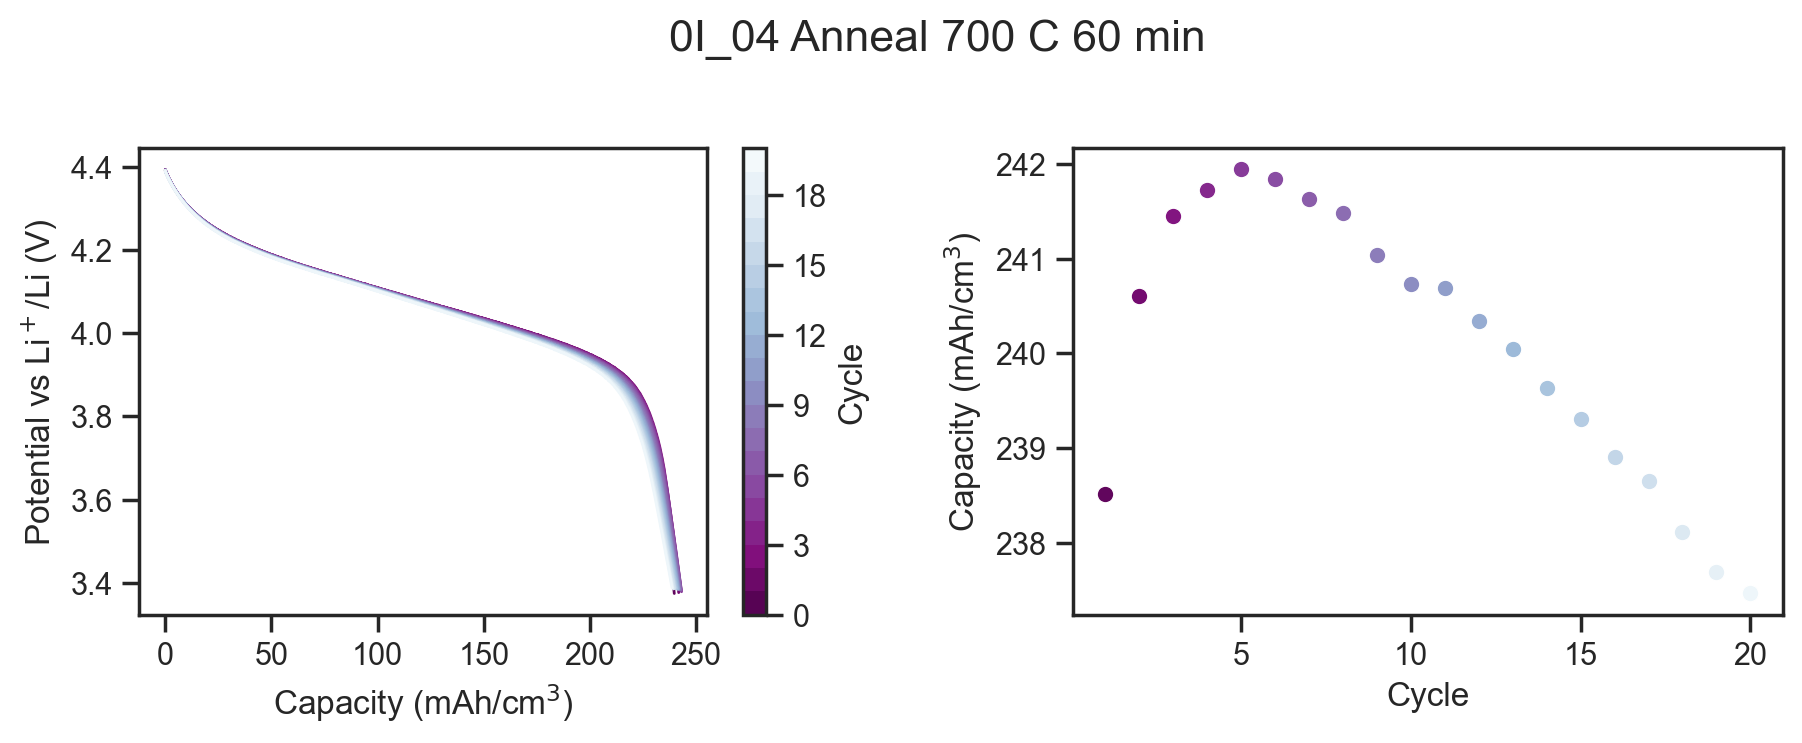

<Figure size 432x288 with 0 Axes>

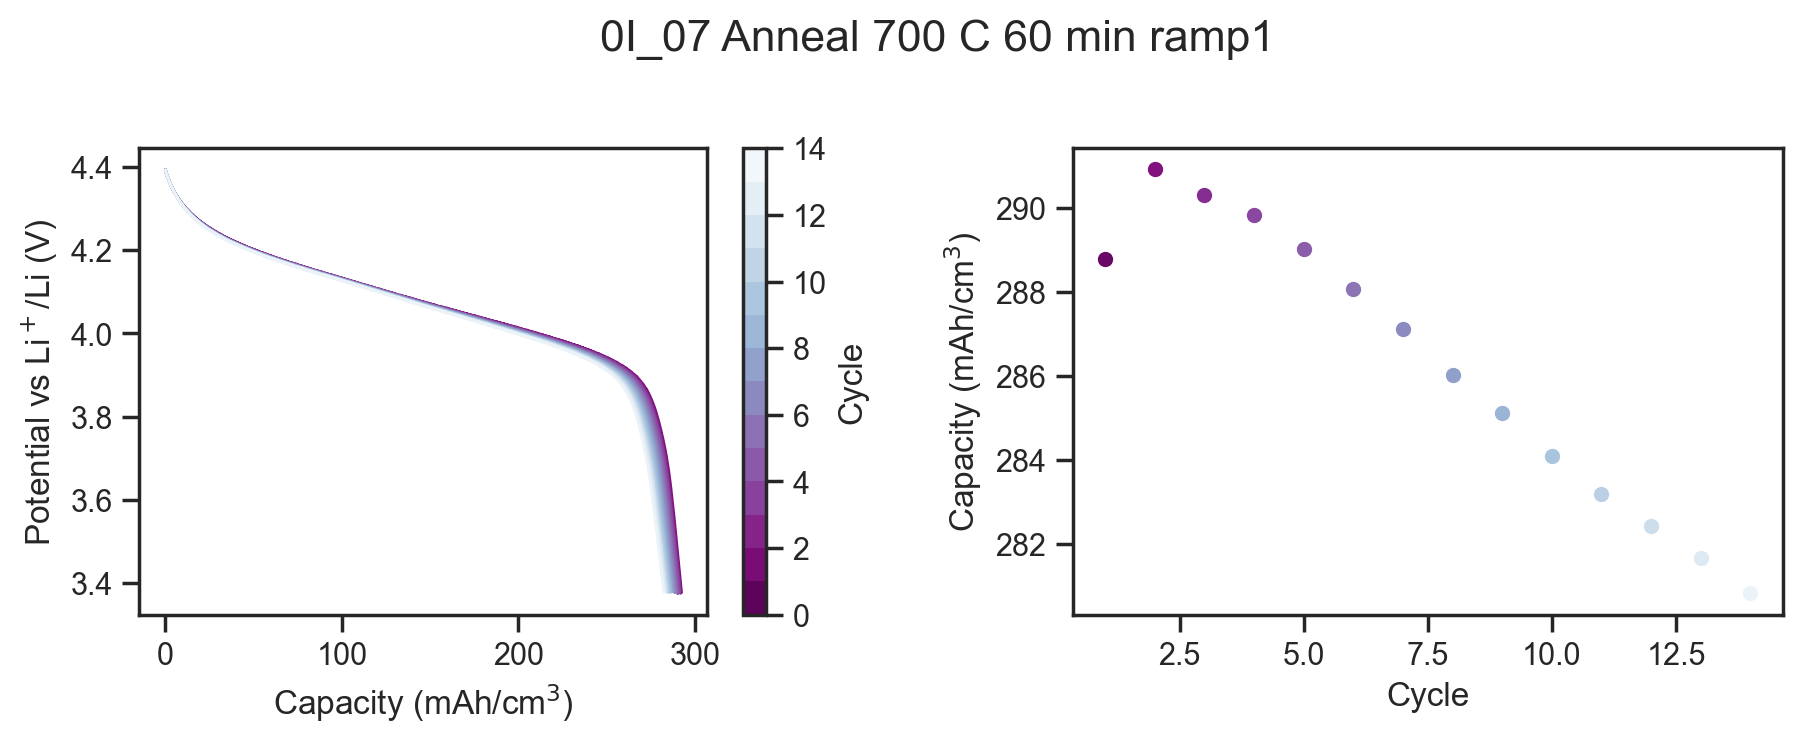

<Figure size 432x288 with 0 Axes>

In [2]:
### 0I_03
# Files
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]

# Settings
sns.set_theme(style="ticks")
palette = 'BuPu_r'
dpi = 200
columns = ['Time (s)', 'Potential vs Li$^+$/Li (V)',  'Current (A)', 'Charge (C)']
sns.set_palette(palette, n_colors = len(files))

# Color bar
Z = [[0,0],[0,0]]
cbar = plt.contourf(Z, levels = np.arange(0, len(files) + 1, 1), cmap=palette)
plt.clf()

# Plot
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (10, 4))
fig.tight_layout(pad = 4)
fig.suptitle('0I_03 Anneal 700 C 20 min', fontsize=16)

# Data
data = pd.DataFrame(columns=['Cycle', 'Capacity (mAh/cm$^3$)' ])
thickness = (53.6 + 53.46 + 52.37) / 3 #nm

n = 1
for i in files:
    df = pd.read_csv(i, sep = ';', usecols = [1, 2, 3, 4], names = columns, skiprows = 1)
    df['Capacity (mAh/cm$^3$)'] = -1 * df['Charge (C)'] /3.6 / (0.63 * 1e-7 * thickness)    
    df['Cycle'] = n
    capcity = df['Capacity (mAh/cm$^3$)'][-10:-9] ############ edit this
    sns.lineplot(data = df, x = 'Capacity (mAh/cm$^3$)', y = columns[1], lw =1, ax = ax[0])
    sns.scatterplot(data = df, x = 'Cycle', y = capcity )
    n += 1
plt.colorbar(cbar, ax = ax[0]).set_label('Cycle')
plt.show()
plt.clf()


### 0I_04
# Files
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]

# Settings
sns.set_theme(style="ticks")
palette = 'BuPu_r'
dpi = 200
columns = ['Time (s)', 'Potential vs Li$^+$/Li (V)',  'Current (A)', 'Charge (C)']
sns.set_palette(palette, n_colors = len(files))

# Color bar
Z = [[0,0],[0,0]]
cbar = plt.contourf(Z, levels = np.arange(0, len(files) + 1, 1), cmap=palette)
plt.clf()

# Plot
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (10, 4))
fig.tight_layout(pad = 4)
fig.suptitle('0I_04 Anneal 700 C 60 min', fontsize=16)

# Data
data = pd.DataFrame(columns=['Cycle', 'Capacity (mAh/cm$^3$)' ])
# thickness = 

n = 1
for i in files:
    df = pd.read_csv(i, sep = ';', usecols = [1, 2, 3, 4], names = columns, skiprows = 1)
    df['Capacity (mAh/cm$^3$)'] = -1 * df['Charge (C)'] /3.6 / (0.63 * 1e-7 * thickness)
    df['Cycle'] = n
    capcity = df['Capacity (mAh/cm$^3$)'][-10:-9] ############ edit this
    sns.lineplot(data = df, x = 'Capacity (mAh/cm$^3$)', y = columns[1], lw =1, ax = ax[0])
    sns.scatterplot(data = df, x = 'Cycle', y = capcity )
    n += 1
plt.colorbar(cbar, ax = ax[0]).set_label('Cycle')
plt.show()
plt.clf()

### 0I_07
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07\lith'
files = [os.path.join(path, i) for i in os.listdir(path)]
sns.set_palette(palette, n_colors = len(files))

# Color bar
Z = [[0,0],[0,0]]
cbar = plt.contourf(Z, levels = np.arange(0, len(files) + 1, 1), cmap=palette)
plt.clf()

# Plot
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi, ncols = 2, figsize = (10, 4))
fig.tight_layout(pad = 4)
fig.suptitle('0I_07 Anneal 700 C 60 min ramp1', fontsize=16)

# Data
data = pd.DataFrame(columns=['Cycle', 'Capacity (mAh/cm$^3$)' ])
n = 1
for i in files:
    df = pd.read_csv(i, sep = ';', usecols = [1, 2, 3, 4], names = columns, skiprows = 1)
    df['Capacity (mAh/cm$^3$)'] = -1 * df['Charge (C)'] /3.6 / (0.63 * 1e-7 * thickness)    
    df['Cycle'] = n
    capcity = df['Capacity (mAh/cm$^3$)'][-10:-9] ############ edit this
    sns.lineplot(data = df, x = 'Capacity (mAh/cm$^3$)', y = columns[1], lw =1, ax = ax[0])
    sns.scatterplot(data = df, x = 'Cycle', y = capcity )
    n += 1
plt.colorbar(cbar, ax = ax[0]).set_label('Cycle')
plt.show()
plt.clf()


In [3]:
# Fix file name
n = 1
for i in files:
    if '_' in  i[-6]:
        #print(i)
        #print((i[:-5] + '0' + str(n) + '.txt'))
        os.renames(i, i[:-5] + '0' + str(n) + '.txt')
        n += 1

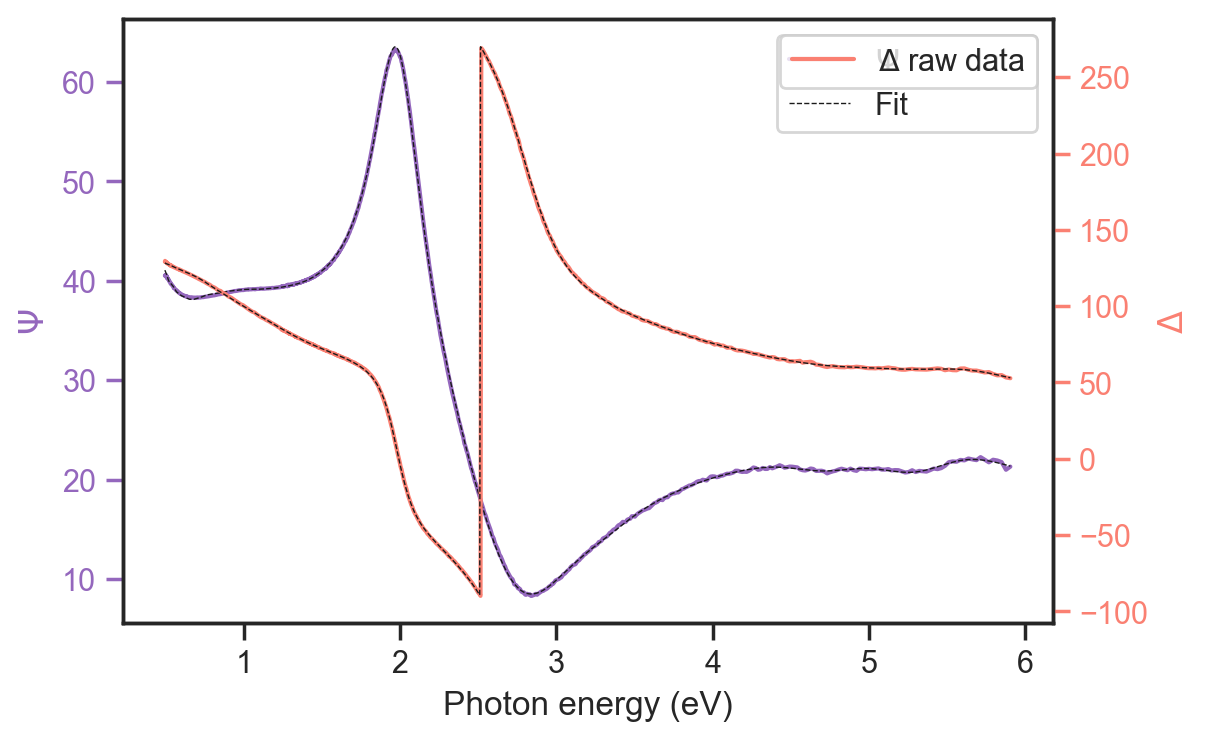

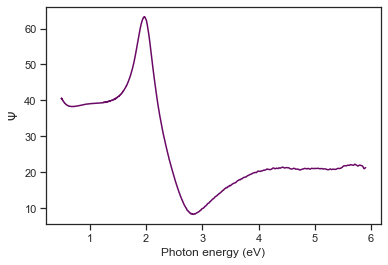

In [4]:
# Ellipsometry

# Settings
c = 299792458 * 1e9 # nm/s speed of light
h = 4.135667696e-15 # eV sec planck constant
def photon_energy(wavelength):
    return h * c / wavelength
dpi = 200
col = ['Wavelength (nm)', '$\Psi$', '$\Delta$', '$\Psi$_m', '$\Delta$_m']
fig, ax = plt.subplots(facecolor = 'white', dpi = dpi)
ax.yaxis.label.set_color('tab:purple')

#ax.spines['bottom'].set_color('red')
#ax.spines['top'].set_color('tab:purple')
ax.tick_params(axis='y', colors='tab:purple')

# Sample 0I_03
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Ellipsometry\LSB_09\0I_03\raw'
files = [os.path.join(path, i) for i in os.listdir(path)]

df = pd.read_csv(files[0], skiprows = 2, sep = '\s+', names =  col)
col.append('Photon energy (eV)')
df[col[5]] = photon_energy(df[col[0]])
sns.lineplot(data = df, x = col[5], y = col[1], color = 'tab:purple', label = '$\Psi$ raw data')
sns.lineplot(data = df, x = col[5], y = col[3], color = 'k', linestyle = 'dashed', lw = 0.5, label = 'Fit')
ax2 = ax.twinx()
ax2.yaxis.label.set_color('salmon')
ax2.tick_params(axis='y', colors='salmon')
sns.lineplot(data = df, x = col[5], y = col[2], ax = ax2, color = 'salmon', label = '$\Delta$ raw data')
sns.lineplot(data = df, x = col[5], y = col[4], ax = ax2, color = 'k', linestyle = 'dashed', lw = 0.5)
plt.legend()
plt.show()
plt.clf()


sns.lineplot(data = df, x = col[5], y = col[1])
# Thickness

t = np.array([53.60, 53.46, 52.37])
t_c = np.array([55.90, 56.24, 56.44])


53.143333333333324 1.0 10.087777777777774
Growth rate = 0.01196 nm/s


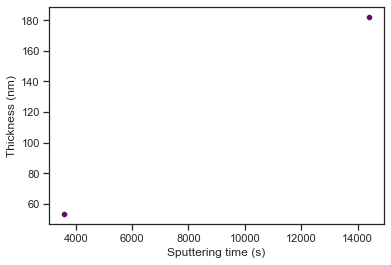

In [5]:
### Deposition time
t = t
t_4h = np.array([182.04, 181.92, 181.46, 181.97, 184.16])
t1 = (3600, sts.mean(t))
t2 = (3600 * 4 , sts.mean(t_4h))
t3 = 0
cols = ['Sputtering time (s)', 'Thickness (nm)']
df = pd.DataFrame([t1, t2], columns = cols) #np.array([annealing_time, thickness]))

sns.scatterplot(data = df, x = cols[0], y = cols[1])

slope, intercept, r_value, p_value, std_err = linregress(df[cols[0]], df[cols[1]])
print(slope * 3600 + intercept, r_value**2, intercept)
 
print('Growth rate = ' + '{:.5f}'.format(slope) + ' nm/s')

In [1]:
# Confidence interval, error bars

sns.set_theme(style="ticks")

#sns.set_palette('viridis')
x = np.linspace(0, 10, 11)

y = [i * 2 + np.random.randint(10) for i in x]
y2 = [i + np.random.randint(10) for i in y]
y3 = [i + np.random.randint(10) for i in y]
z = np.append(x, x)
q = np.append(y, y2)

xt = np.append(z, x)
yt = np.append(q, y3)

df = pd.DataFrame(list(zip(xt, yt)), columns=['x', 'y'])
df
def line(x, m, b):
    return x *m + b

gmodel = Model(line)
param = gmodel.make_params()
param['m'].set(value = 1)
param['b'].set(value = 0)
result = gmodel.fit(yt, param, x = xt)
#print(result.fit_report())

sns.relplot(data = df, x = 'x', y = 'y', color = 'k') #, kind = 'line')
#plt.show()
#plt.clf()
# sns.relplot(data = df, kind = 'line', x = 'x', y = 'y', errorbar = 'sd')
#sns.pointplot(data = df, x = 'x', y = 'y', join = False)
#sns.lineplot(data = df, x = 'x', y = result.best_fit, color = 'k')

#sns.lineplot(data = df, x = 'x', y = result.best_fit, color = 'k')

###sns.regplot(data = df, x = 'x', y = 'y', x_ci = 'sd', x_estimator=np.mean)
# plt.show()
# plt.clf()
# sns.residplot(data = df, x = 'x', y = 'y')

slope, intercept, r_value, p_value, std_err = linregress(df['x'], df['y'])
#print(result.params.items())

result.redchi

NameError: name 'sns' is not defined